<a href="https://colab.research.google.com/github/girishkuks/data_science/blob/main/practice_dt_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
data = pd.read_csv('/content/bank.csv')

In [ ]:
data.shape

(11162, 17)

In [ ]:
data.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


<Axes: xlabel='deposit', ylabel='count'>

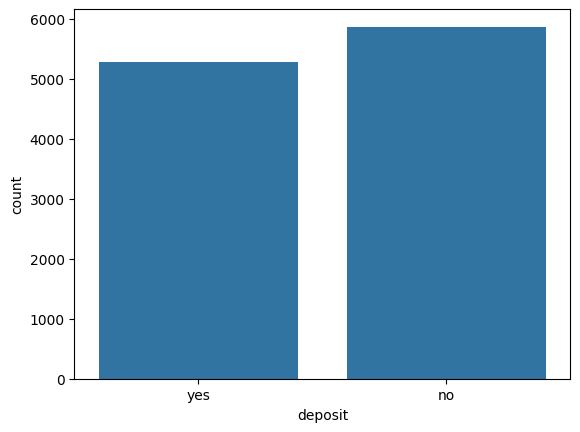

In [ ]:
sns.countplot(x=data['deposit'])

In [ ]:
#Data is balanced, as both yes and no almost equal

In [ ]:
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
for cols in data.columns:
  print(cols,':',data[cols].nunique(),':', data[cols].dtypes)

age : 76 : int64
job : 12 : object
marital : 3 : object
education : 4 : object
default : 2 : object
balance : 3805 : int64
housing : 2 : object
loan : 2 : object
contact : 3 : object
day : 31 : int64
month : 12 : object
duration : 1428 : int64
campaign : 36 : int64
pdays : 472 : int64
previous : 34 : int64
poutcome : 4 : object
deposit : 2 : object


In [ ]:
encoder = LabelEncoder()

In [ ]:
for cols in data.columns:
  if data[cols].dtypes == 'object':
    data[cols] = encoder.fit_transform(data[cols])

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [ ]:
x= data.drop('deposit',axis=1)

In [ ]:
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0


In [ ]:
y = data['deposit']

In [ ]:
y

,deposit
0,1
1,1
2,1
3,1
4,1
...,...
11157,0
11158,0
11159,0
11160,0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
x_test.shape

(2233, 16)

In [ ]:
x_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
3955,28,8,2,2,0,5741,0,0,0,10,11,1042,5,200,3,0
11150,34,4,1,1,0,355,0,0,0,21,1,314,3,-1,0,3
5173,48,10,0,1,0,201,0,0,0,10,9,594,1,91,1,2
3017,53,2,1,2,0,1961,0,0,0,15,2,351,1,-1,0,3
2910,53,4,1,2,0,1624,0,0,0,11,9,166,3,97,7,2


In [ ]:
print(data.shape,':',x_train.shape,':',x_test.shape)

(11162, 17) : (8929, 16) : (2233, 16)


In [ ]:
model = DecisionTreeClassifier(random_state=42,max_depth=8)

In [ ]:
model.fit(x_train, y_train)
training_score = model.score(x_train, y_train)
print('Training Accuracy:', round(training_score*100,2),'%')

Training Accuracy: 85.78 %


In [ ]:
y_pred = model.predict(x_test)

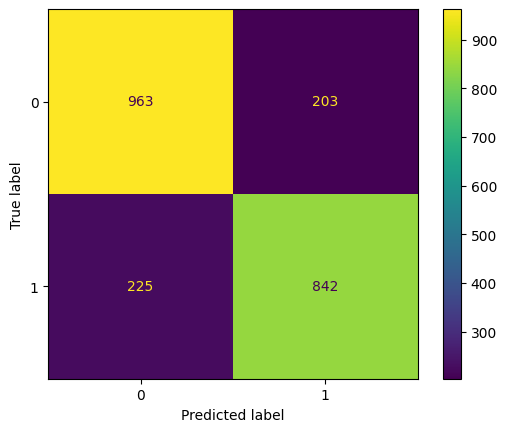

In [ ]:
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)